# 課題2-1: 一元分散分析

A社は、エタノールを製造・販売しています。5本の製造ラインがありますが、これらのラインにより製品の濃度に差がないかどうかを確認したく思います。5本のライン(A, B, C, D, E)から10回ずつサンプリングを行い測定を行った結果が *dataset/data1.csv* です（データ数の合計：50件）。このデータを一元分散分析にて解析し、結論を出してみましょう。なお、有意水準は5％とします。

レッスン7までで学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。

## 1. 必要なモジュールの読み込み

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

## 2. データの読み込み

In [3]:
# データを読み込んで変数 data に格納
data=pd.read_csv('dataset/data1.csv')

In [4]:
# データの最初の5行だけ表示
data.head()

,Density,Line
0,71.624345,A
1,69.388244,A
2,69.471828,A
3,68.927031,A
4,70.865408,A


## 3. データ内容の把握

In [ ]:
#グラフ描画に関して、複数のグラフを表示する必要がない場合はplt.subplotsは使用しなくてもよいです。単にsns.boxplot(x = 'Line', y = 'Density', data = data)でも描画可能です。

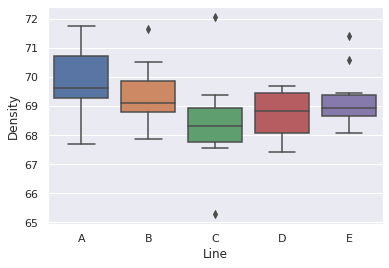

In [23]:
# （データ数が多くはないので）箱髭図にて製造ラインごとの濃度を表示

#提出した自分のコード↓(一応正解になったが、箱髭図が２つ出てしまう)
#f, axes = plt.subplots(1,2, figsize=(10,5))
#sns.boxplot(x='Density', y='Line', data=data, ax=axes[0])

#正解↓
sns.boxplot(x = 'Line', y = 'Density', data = data)


## 4. 分散分析

ここでは理解を深めるために手動で計算して理解を深めましょう。

### 4-1. 効果・誤差の平方和の計算

In [6]:
# ラインの持つ影響（ラインによる影響を考えた場合の濃度）
# 各ラインの濃度の平均値を計算し、それぞれを連結して リストとして格納
me_Line_A = np.mean(data.query('Line == "A"')['Density'])
me_Line_B = np.mean(data.query('Line == "B"')['Density'])
me_Line_C = np.mean(data.query('Line == "C"')['Density'])
me_Line_D = np.mean(data.query('Line == "D"')['Density'])
me_Line_E = np.mean(data.query('Line == "E"')['Density'])
print('Line A:', me_Line_A)
print('Line B:', me_Line_B)
print('Line C:', me_Line_C)
print('Line D:', me_Line_D)
print('Line E:', me_Line_E)

Line A: 69.9028591091939
Line B: 69.36865005840153
Line C: 68.42904350984494
Line D: 68.73809656689362
Line E: 69.23379915563066


In [7]:
#　効果の平方和を求める
mu_n = [69.902859]*10 + [69.368650]*10 + [68.429043]*10 + [68.738096]*10 + [69.233799]*10
mu_n = np.array(mu_n)

mu_all = np.mean(data['Density'])

# 効果
effect = mu_n - mu_all

# 効果の平方和（群間平方和）
squares_Line = np.sum(effect**2)
squares_Line

13.098677762856148

In [10]:
#　誤差を求める
resid = data['Density']-mu_n

In [17]:
#　誤差の平方和を求める

# 誤差の平方和（群内平方和）
squares_resid = np.sum(resid**2)
squares_resid

67.40695311278681

### 4-2. 効果・誤差の分散の計算

In [18]:
 # 効果の自由度を変数 df_model に格納し、誤差の自由度を変数 df_resid に格納する
df_model=4
df_resid=45 #(50-1)-4,（全体の自由度ー１）−4

In [21]:
#効果の分散を求める
variance_effect=squares_Line/df_model
variance_effect

3.274669440714037

In [22]:
# 誤差の分散を求める
variance_resid=squares_resid/df_resid
variance_resid

1.4979322913952624

### 4-3. p値の計算

In [24]:
# F比を求める
f_ratio=variance_effect/variance_resid
f_ratio

2.186126475492305

In [26]:
# p値を求めて、表示する
1-sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)

0.08574946317459575

## 5. Statsmodelsによる分散分析

実務ではStatsmodelsを使って実行していくことになります。次に、Statsmodelsのパッケージを用いて計算してみましょう。

In [31]:
# 最小二乗法を使ってモデルを作成
anova_model = smf.ols('Density ~ Line', data=data).fit() 
#data1のデータに対しBody_length列を元にFeedを予測すると言う形でモデルを定義しそれに対し.fit()
#を学習したものをanova_model_1としています
#製品の濃度が、製造ラインにより影響があるか？ということですから、smf.ols(濃度 ~ 製造ライン) ですね。

In [32]:
#sum_sqの欄は平方和になります。
#67.406953は、自分で実際に手動で計算した、群内の平方和を求めるの値と一致していますね。
#Residual というのは残差　という意味です。その行のsum_sqは、sum和のsquere平方(=二乗)になります
#dfの方は自由度です。# 群間変動の自由度を変数 df_model に格納し、群内変動の自由度を変数 df_resid に格納する
#で代入した値と一致しているはずです。
#FはF比、PR(>F)はp値です。
#1F比を求める
#2p値を求めて、表示する
#の部分で手動計算した値と一致しているはずです
#もし一致していなかったら、手動計算が誤りですね。
#一番重要なのは、p値で、そこで有意水準以下かどうかで判断を下します。

In [33]:
# Statsmodelsの関数で分散分析を実行し、結果を表示
sm.stats.anova_lm(anova_model, typ=2)
#次にsm.stats.anova_lm(anova_model_1, typ=2)
#で引数にanova_model_1を与えることにより、それに対する分散分析を行うと言う処理が行われます。

,sum_sq,df,F,PR(>F)
Line,13.098668,4.0,2.186125,0.08575
Residual,67.406953,45.0,NaN,NaN


手動で計算した場合と結果は一致しましたか？

In [ ]:
#帰無仮説には「差がない」という状態を設定するのが普通です。
#それに対して対立仮説には「差がある」という状態を設定します。
#帰無仮説は、製造ラインによって濃度に差がない
#対立仮説は、製造ラインによって濃度に差がある
#例えば有意水準を 5% とした場合では、上図の F 分布の右側 5% 分の領域が棄却域ということになります。
#棄却域よりも右側に x の値が来れば p 値は 5% よりも小さくなり、帰無仮説を棄却することになります。
#棄却域よりも左側に x の値が来れば p 値は 5% よりも大きくなり、帰無仮説は棄却できないということになります。


#要するに0.0001みたいに小さい値なら帰無仮説を棄却しろ　　小さければ小さいほど棄却される可能性が高くなる　　有意差がある
#要するに0.08598989みたいに大きい値なら帰無仮説は棄却できない　有意差があるとは言えない

## 6. 結果の解釈

ラインによって、製品の濃度は「有意差があるとは言えない」と判断できる（ここをダブルクリックして編集状態にし、カギカッコの中に文言を埋めてください）

*補足：有意差がみられた場合、これは化学メーカーとしては問題ですので製造ラインの詳細を確認する必要があります。*